### 第一題[myknn_regressor]

import 本次功課會用到的套件

In [1]:
import pickle
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

寫**導入資料**&**RMSE**&**MAE**的function

In [2]:
def rmse(predictions, targets):
    
    return np.sqrt(((predictions - targets) ** 2).mean())

def mae(predictions, targets):

    return np.sum(np.abs(predictions-targets)) / targets.size

def load_data(doscaling):
    
    with open('msd_data1.pickle', 'rb') as fh1:
        msd_data = pickle.load(fh1)

    if (doscaling == 1):
        xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
        #standardize feature values
        X_train = xscaler.transform(msd_data['X_train'])
        X_test = xscaler.transform(msd_data['X_test'])
    else:
        X_train = msd_data['X_train']
        X_test = msd_data['X_test']

    Y_train = msd_data['Y_train']
    Y_test = msd_data['Y_test']
    
    return X_train, X_test, Y_train, Y_test

**Q1.1** 
接著運用作業提供的skeleton來完成myknn_regressor

In [3]:
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        self.n = n_neighbors
        self.t = mean_type
        # 題目要求
        if n_neighbors < 10 and mean_type == "remove_outliers":
            self.t = "equal_weight"

    def fit(self, x_train, y_train):
        self.x = x_train
        self.y = y_train

    def predict(self, x_test):
        prediction = []
        for i in range(len(x_test)):
            data = []
            label = []
            ans = 0
            # 同時記錄距離與其順序
            for j in range(len(self.x)):
                data.append([np.linalg.norm(x_test[i] - self.x[j]), j])
            data.sort()
            # 根據提供的n值擷取list
            data = data[0:self.n]
            for d, j in data:
                label.append(self.y[j])

            if self.t == "equal_weight":
                for l in label:
                    ans += l
                prediction.append(ans/self.n)
            else:
                ok_label = []
                q1 = np.percentile(label, 25)
                q3 = np.percentile(label, 75)
                iqr = q3 - q1
                for l in label:
                    if l >= q1-1.5*iqr and l <= q3+1.5*iqr:
                        ok_label.append(l)
                for l in ok_label:
                    ans += l
                prediction.append(ans/(len(ok_label)))
                
        return prediction

**Q1.2**
根據要求(Make predictions using $k=20$ and "equal_weight" $f$.)

得到下列結果:

In [4]:
[X_train, X_test, Y_train, Y_test] = load_data(1)
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
print("RMSE: ", rmse(ypred, Y_test))
print("Prediction: ", ypred[0:20])

RMSE:  10.25126451549596
Prediction:  [1993.35, 1993.8, 2000.65, 1991.5, 1992.8, 1998.5, 1988.1, 1991.65, 2002.25, 2003.0, 2000.5, 1998.65, 1995.55, 1997.2, 1995.05, 1997.4, 1992.15, 2000.45, 2003.2, 1995.75]


**Q1.3**
根據要求(Make predictions using $k=20$ and "remove_outier" $f$.)

得到下列結果:

In [5]:
[X_train, X_test, Y_train, Y_test] = load_data(1)
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
print("RMSE: ", rmse(ypred, Y_test))
print("Prediction: ", ypred[0:20])

RMSE:  10.212572466080376
Prediction:  [1993.35, 1993.8, 2000.65, 1992.7368421052631, 1992.8, 2000.0, 1988.1, 1991.65, 2002.25, 2003.9473684210527, 2000.5, 2000.9444444444443, 1995.55, 1997.2, 1998.611111111111, 1997.4, 1992.15, 2003.8333333333333, 2003.2, 1995.75]


### 第二題 [Tuning the Hyper-parameter]

In [6]:
neighbors = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

**First Case**: all feature values are standardized to have unit variances and zero means

In [7]:
[X_train, X_test, Y_train, Y_test] = load_data(1)
first_rmse = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    ypred = knn.predict(X_test)
    first_rmse[i] = rmse(ypred, Y_test)

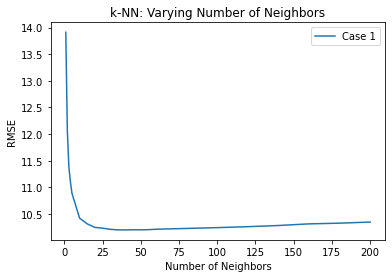

In [8]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, first_rmse, label = 'Case 1')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.show()

**Second Case**: do not apply feature scaling

In [9]:
[X_train, X_test, Y_train, Y_test] = load_data(0)
second_rmse = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    ypred = knn.predict(X_test)
    second_rmse[i] = rmse(ypred, Y_test)

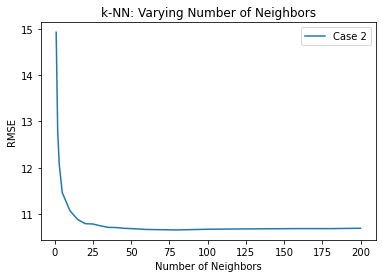

In [10]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, second_rmse, label = 'Case 2')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.show()

**Third Case**: standardized features and adopted myknn_regressor with "remove_outlier"  𝑓  to make predictions.

In [11]:
[X_train, X_test, Y_train, Y_test] = load_data(0)
third_rmse = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    myknn = myknn_regressor(k, "remove_outlier")
    myknn.fit(X_train, Y_train)
    ypred = myknn.predict(X_test)
    third_rmse[i] = rmse(ypred, Y_test)

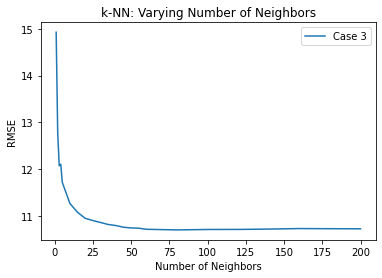

In [12]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, third_rmse, label = 'Case 3')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.show()

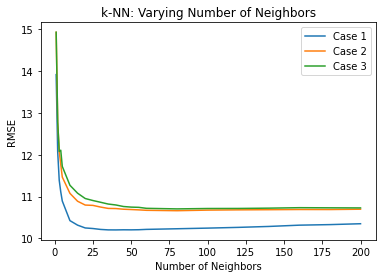

In [13]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, first_rmse, label = 'Case 1')
plt.plot(neighbors, second_rmse, label = 'Case 2')
plt.plot(neighbors, third_rmse, label = 'Case 3')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.show()

從上圖發現對於此資料集

以Case1與Case2做比較，有標準化過後的表現比較好(Case 1)

而整體而言表現最好的是myknn，雖然他運行速度最慢

### 第三題 [Lasso Regression]

**Q3.1**

$$
L = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda [\sum_{j=1}^{M} |w_j|]
$$

$$
W_j=\frac{\sum_{i=1}^{n}(y_i-\mathbf{w_{-j}}^Tx_{ij}-w_0)(x_{ij})-\lambda nsgn(w_j)}{\sum_{i=1}^{n}x_{ij^2}}
$$

$$
Thresholding = \frac{\lambda n}{\sum_{i=1}^{n}x_{ij^2}}
$$

**Q3.2**

In [5]:
class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        
        self.lam = lamcoef
        self.iter = max_iter
        self.tol = tol
        self.const_regu = const_regu

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        
        self.x = x_train
        self.y = y_train
        self.winit = winit
        self.keep = keep_traindata
        self.verbose = verbose

        # add an intercept column to X
        x_with_intercept = np.c_[np.ones((self.x.shape[0],1)), x_train]     
        self.x_intercept = x_with_intercept  # 5000 x 91
        self.w = np.zeros(self.x.shape[1]+1)  # 91 x 1
        self.z = np.sum(self.x_intercept * self.x_intercept, axis = 0)  # 1 x 91

    def temp_predict(self, x_with_intercept, weight):
        
        temp = x_with_intercept @ weight  # 5000 x 1
        
        return temp
    
    def w_star(self, x_intercept, j, weight):
        
        x_j = x_intercept[j] # 91 x 1
        w_j = weight[j]  # coef. of j
        x_without_j = np.delete(x_intercept, j, 1)  # 5000 x 90
        w_without_j = np.delete(weight, j)
        pred = self.temp_predict(x_without_j, w_without_j)
        residual = self.y - pred  # 5000 x 1
        w_star_j = np.sum(x_intercept[:,j]*residual)
        
        return w_star_j

    
    def coordinate_descent(self, y, x_intercept):
        
        w = self.w
        z = self.z
        for i in range(self.iter):
            # loop through each features
            for j in range(len(w)):
                w_star_j = self.w_star(x_intercept, j, w)
                if j == 0:
                    w[j] = w_star_j / z[j]
                elif w_star_j - self.lam*len(y) > 0:
                    w[j] = (w_star_j - self.lam*len(y))/z[j]
                elif w_star_j + self.lam * len(y) < 0:
                    w[j] = (w_star_j  + self.lam*len(y))/z[j]
                else:
                    w[j] = 0
                    
        return w   
        
    def predict(self, x_test):
        
        w_final = self.coordinate_descent(self.y, self.x_intercept)
        x_with_intercept = np.c_[np.ones((x_test.shape[0],1)), x_test]
        ypred = x_with_intercept @ w_final
        self.ypred = ypred
        self.w_final = w_final
        
        return ypred, w_final
    
    def loss(self, ytrue):
        
        sum = 0
        for w in self.w_final:
            sum += w
        penalty = self.lam*abs(sum)
        loss = (1/2)*(np.linalg.norm(ytrue-self.ypred))**2 + penalty
        
        return loss

**Q3.3**

In [6]:
[X_train, X_test, Y_train, Y_test] = load_data(0)
mlo = mylasso(lamcoef = 0.1)
mlo.fit(X_train, Y_train)
ypred = mlo.predict(X_train)[0]
weight = mlo.predict(X_train)[1]
print("Training loss: ", mlo.loss(Y_train))
print("RMSE in training data: ", rmse(ypred, Y_train))
print("MAE in training data: ", mae(ypred, Y_train))
print("Intercept: ", weight[0])
np.set_printoptions(suppress=True)
print("Weights: ", weight[1:])
count = 0
for w in weight:
    if w == 0:
        count += 1
print("Number of non-zero weights: ", count)

Training loss:  233046.5094726328
RMSE in training data:  9.650962631545008
MAE in training data:  6.946521224938505
Intercept:  1951.992159187264
Weights:  [ 0.81804089 -0.05420823 -0.03920671  0.01922758 -0.02927641 -0.27628752
  0.00116389 -0.10663504 -0.05185597 -0.01486019 -0.07496416 -0.04699719
  0.03404691  0.00000755 -0.00076566  0.00069989  0.00044112  0.00162554
  0.00204262  0.00223663  0.0027119   0.00258369  0.00954763  0.00153349
 -0.00305082  0.00026767  0.00203723  0.00062351  0.00179824  0.0000377
 -0.00334064 -0.00586339 -0.00269277 -0.00349176 -0.00672242 -0.00279911
 -0.00011479  0.00060981  0.00188849 -0.00072081 -0.00177496 -0.00233852
 -0.00116383  0.00437661 -0.00734514  0.00304442  0.00017152 -0.00160565
 -0.00044359  0.0018104   0.00454541  0.00198471  0.00229605  0.00284019
 -0.00034934  0.00041044 -0.00211714  0.00198803 -0.00160134  0.00042149
 -0.0045469   0.00395036 -0.0075227   0.00077033 -0.00248528 -0.00043549
  0.00203861 -0.00149359 -0.00173504 -0.0

**Q3.4**

In [7]:
[X_train, X_test, Y_train, Y_test] = load_data(0)
mlo = mylasso(lamcoef = 0.1)
mlo.fit(X_train, Y_train)
ypred = mlo.predict(X_test)[0]
print("Prediction: ", ypred[0:5])
print("Test RMSE: ", rmse(ypred, Y_test))
print("Test MAE: ", mae(ypred, Y_test))

Prediction:  [1992.20191219 1998.45247086 2003.73112654 1990.32942093 1993.20816988]
Test RMSE:  9.64389761855533
Test MAE:  6.944525726688372


**Q3.5**

In [20]:
[X_train, X_test, Y_train, Y_test] = load_data(0)
lam = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
training_loss = []
counts = []
weight_size = []
train_rmse = []
test_rmse = []

for l in lam:
    mlo = mylasso(lamcoef = l)
    mlo.fit(X_train, Y_train)
    
    ypred_train = mlo.predict(X_train)[0]
    weight_train = mlo.predict(X_train)[1]
    training_loss.append(mlo.loss(Y_train))
    ypred_test = mlo.predict(X_test)[0]
    weight_test = mlo.predict(X_test)[1]
    
    count = 0
    temp = 0
    for w in weight_train:
        count += w
    counts.append(count)
    for w in weight_train:
        temp += w
    weight_size.append(temp/len(weight_train))
    train_rmse.append(rmse(ypred_train, Y_train))
    test_rmse.append(rmse(ypred_test, Y_test))

此部分合理，因為懲罰越多

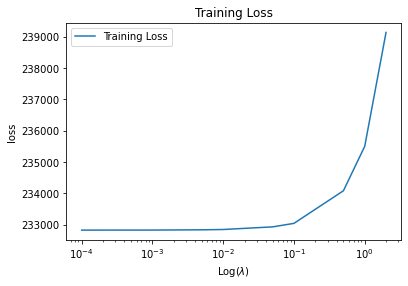

In [21]:
plt.title('Training Loss')
plt.plot(lam, training_loss, label = 'Training Loss')
plt.legend()
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('loss')
plt.show()

從圖表分析中發現理應lambda越大所造成的懲罰越重，然而我的non-zero weight和average weight size卻成反向的樣子，這點應該是我function某部分出錯

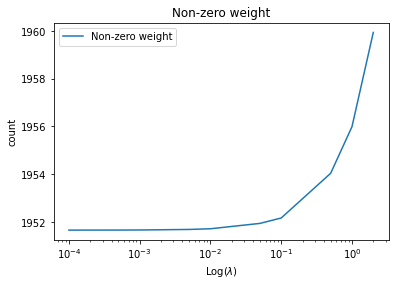

In [22]:
plt.title('Non-zero weight')
plt.plot(lam, counts, label = 'Non-zero weight')
plt.legend()
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('count')
plt.show()

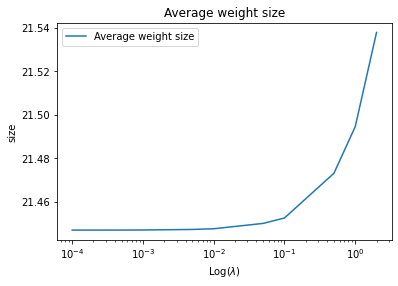

In [23]:
plt.title('Average weight size')
plt.plot(lam, weight_size, label = 'Average weight size')
plt.legend()
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('size')
plt.show()

test的rmse有比較低的走勢

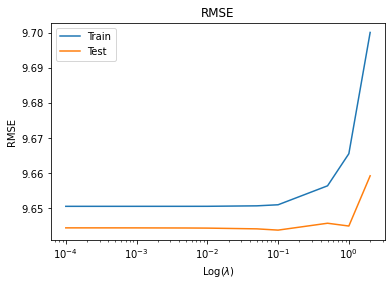

In [24]:
plt.title('RMSE')
plt.plot(lam, train_rmse, label = 'Train')
plt.plot(lam, test_rmse, label = 'Test')
plt.legend()
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('RMSE')
plt.show()